# Project: Investigate a Dataset - Gapminder World Datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

### Project Description 
 This project investigate datasets `from Gapminder World` website, I'm discussing the factors that contribute to the quality of life of citizens in some countries over the years from **1990 to 2005**. I chose these specific metrics because every single one of them affects people's lives heavily and almost shape their lives. I was wondering when I was choosing these data "How population growth affects people's lives? how these metrics contribute to suicide rate around the globe? and what are the correlation between these rates and each other?".


### Dataset Description 

> - **Population Density**
Average number of people of each square km of the land in the given country
`Population > population density`
> - **Income Per Person**
Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).
`Income`
> - **Life Expectancy**
The average number of years a newborn child would live if current mortality patterns were to stay the same.
`Life expectancy`
> - **Human Development Index**
Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.
`Society > Human development index`
> - **Suicide Rate**
Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted. This rate is calculated as if all countries had the same age composition of the population.
`Health > Mental Health > Suicide / 100k people`


In [85]:
##Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## **Data Wrangling**


In [86]:
# .csv files
df_population = pd.read_csv('C:/Users/Eman Abd El-Hamied/Downloads/population_density_per_square_km.csv')
df_income = pd.read_csv('C:/Users/Eman Abd El-Hamied/Downloads/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life_exp = pd.read_csv('C:/Users/Eman Abd El-Hamied/Downloads/life_expectancy_years.csv')
df_suicide = pd.read_csv('C:/Users/Eman Abd El-Hamied/Downloads/suicide_per_100000_people.csv')
df_human_dev = pd.read_csv('C:/Users/Eman Abd El-Hamied/Downloads/hdi_human_development_index.csv')


## **Data Cleaning**


### Brief about datasets
 These data have so much going on, so we will do this:
 > - Trim the years to get the range we want
 > - Unify all data types
 > - Handle NaN values
 > - Adjust the tables to be in thte format of **Country, Year, Metric Name**
 > - Merge all datasets together to get the final table 

In [87]:
"""
Removes 'k' character from data and replace it with right thousand number
Args:
    Data frame
Returns:
    (DataFrame) updated data frame
"""

def convert_thousands(df):
    for c in df.loc[:,'1990':]:
        if df[c].str.contains('k').any():
            df[c] = df[c].apply(lambda x:  x.replace('k','00').replace('.','') if '.'in x  and 'k' in x in x else (x.replace('k','000') if 'k' in x else x))
            
    return df

In [88]:
"""
Prints data types and null count
Args:
    Data frame
"""

def get_info(df):
    print(df['1990'].dtype)
    print(df['country'].dtype)
    print(df.isnull().sum().sum())

In [89]:
"""
Reshapes the data as country, year, new column
Args: 
    Data frame and new column name value
Returns:
    (DataFrame) updated data frame
"""

def melt_data(df,new_value_name):
    df = pd.melt(df, id_vars = ['country']
                        , var_name = 'year'
                        , value_vars = years 
                        , value_name = new_value_name) 
    df.sort_values(by= ['country','year'],inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

In [90]:
#Population Dataset
get_info(df_population)
df_population.head(1)

object
object
0


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,211,213,216,223,232,243,255,268,281,...,576,575,574,573,572,572,571,570,569,568


In [91]:
#Trimming the years to the wanted range
df_population.drop(df_population.columns[df_population.columns.get_loc('2016'):],axis=1,inplace=True)
df_population.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,211,213,216,223,232,243,255,268,281,...,560,562,563,564,565,567,570,573,577,580


In [92]:
df_population.drop(df_population.columns[df_population.columns.get_loc('1950'):df_population.columns.get_loc('1990')],axis=1,inplace=True)
df_population.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,345,359,379,403,426,446,462,475,485,...,560,562,563,564,565,567,570,573,577,580


In [93]:
#We didn't use the convert_thousands function here because population density is in the format of "2.7k"we just want to remove 'k' to clean the data
for c in df_population.loc[:,'1990':]:
        if df_population[c].str.contains('k').any():
                df_population[c] = df_population[c].apply(lambda x:  x.replace('k','') if 'k' in x else x)
            
df_population.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,345,359,379,403,426,446,462,475,485,...,560,562,563,564,565,567,570,573,577,580
1,Afghanistan,19,20.4,22.2,24.2,26.2,27.7,28.9,29.6,30.2,...,40.5,41.5,42.5,43.5,44.7,46.1,47.7,49.4,51.1,52.7
2,Angola,9.5,9.83,10.2,10.5,10.8,11.2,11.6,11.9,12.3,...,16.2,16.8,17.4,18.1,18.7,19.4,20.1,20.9,21.6,22.4
3,Anguilla,98.8,102,104,105,107,110,112,115,119,...,141,143,145,147,149,151,153,155,157,159
4,Albania,120,120,118,117,115,114,113,113,114,...,112,111,110,109,108,107,106,106,106,105


In [94]:
#We convert the thousands format to the format of '2.7'
for c in df_population.loc[:,'1990':]:
        df_population[c] = df_population[c].apply(lambda x: x[:1] + '.'+ x[1:] if ('.' not in x) and (len(x) > 3) else x)
            

In [95]:
#Converting data to float
for c in df_population.loc[:,'1990':]:
    df_population[c] = df_population[c].astype(float)

In [96]:
#Income data
get_info(df_income)
df_income.head(1)

object
object
0


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480


In [97]:
#Trimming years
df_income.drop(df_income.columns[df_income.columns.get_loc('2016'):],axis=1,inplace=True)
df_income.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,1320,1460,1480,1760,1960,1910,2080,2120,2100,2070


In [98]:
df_income.drop(df_income.columns[df_income.columns.get_loc('1800'):df_income.columns.get_loc('1990')],axis=1,inplace=True)
df_income.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1110,1010,971,665,493,728,690,656,627,...,1320,1460,1480,1760,1960,1910,2080,2120,2100,2070


In [99]:
#converting thousands
df_income=convert_thousands(df_income)
df_income.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1110,1010,971,665,493,728,690,656,627,...,1320,1460,1480,1760,1960,1910,2080,2120,2100,2070


In [100]:
#converting to float
for c in df_income.loc[:,'1990':]:
    df_income[c] = df_income[c].astype(float)
df_income.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1110.0,1010.0,971.0,665.0,493.0,728.0,690.0,656.0,627.0,...,1320.0,1460.0,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0


In [101]:
#Life Expectancy Dataset 
get_info(df_life_exp)
df_life_exp.head(1)

float64
object
2079


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8


In [102]:
#Trimming years
df_life_exp.drop(df_life_exp.columns[df_life_exp.columns.get_loc('2016'):],axis=1,inplace=True)
df_life_exp.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,58.0,58.5,59.2,59.9,60.5,61.0,61.4,61.9,61.9,61.9


In [103]:
df_life_exp.drop(df_life_exp.columns[df_life_exp.columns.get_loc('1800'):df_life_exp.columns.get_loc('1990')],axis=1,inplace=True)
df_life_exp.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,53.8,53.8,54.2,54.4,53.9,54.3,54.7,54.5,53.3,...,58.0,58.5,59.2,59.9,60.5,61.0,61.4,61.9,61.9,61.9


In [104]:
#Dropping NAN values and see if there is any duplications
df_life_exp.dropna(inplace=True)
df_life_exp.duplicated().sum()

0

In [105]:
#Suicide Rate data
get_info(df_suicide)
df_suicide.head(1)

float64
object
4713


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Trimming years
df_suicide.drop(df_suicide.columns[df_suicide.columns.get_loc('2016'):],axis=1,inplace=True)
df_suicide.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN


In [107]:
df_suicide.drop(df_suicide.columns[df_suicide.columns.get_loc('1950'):df_suicide.columns.get_loc('1990')],axis=1,inplace=True)
df_suicide.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,1.6,2.5,1.8,2.9,2.96,5.48,4.95,...,NaN,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN


In [108]:
#We used median to fill NAN values over the rows, we didn't drop them all like other datasets because there are too many NaNs
df_temp_median = df_suicide.loc[:,'1990':].median(axis=1,skipna=True)
for i, col in enumerate(df_suicide):
             df_suicide.iloc[:, i] = df_suicide.iloc[:, i].fillna(df_temp_median)


In [109]:
#Dropping the NaN values left
df_suicide.dropna(inplace=True)
df_suicide

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,4.050,4.050,1.600,2.500,1.800,2.900,2.960,5.480,4.950,...,4.050,4.060,5.340,4.050,3.080,4.050,4.050,4.050,4.050,4.050
1,Argentina,6.790,6.120,6.790,6.810,6.720,6.460,6.470,6.720,6.720,...,6.720,6.720,6.720,6.720,6.720,6.720,6.720,6.720,6.720,6.720
2,Armenia,3.020,2.290,2.470,2.990,3.210,3.590,2.470,2.040,1.710,...,2.040,2.040,1.740,2.040,2.040,2.040,2.390,1.920,1.540,2.020
4,Australia,12.200,12.500,12.100,10.800,12.000,11.300,12.400,13.500,13.300,...,9.450,9.710,9.960,9.620,9.820,9.730,10.300,10.200,11.200,11.600
5,Austria,19.500,18.700,18.600,17.700,18.600,18.500,18.000,16.400,15.900,...,11.900,11.800,11.200,11.400,11.400,11.400,10.900,10.700,11.200,10.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,USSR,20.600,20.600,20.600,20.600,20.600,20.600,20.600,20.600,20.600,...,20.600,20.600,20.600,20.600,20.600,20.600,20.600,20.600,20.600,20.600
112,Uzbekistan,9.440,8.840,7.840,8.020,8.260,8.700,9.510,8.370,8.330,...,8.350,8.350,8.350,8.350,8.350,8.350,8.350,8.350,8.350,8.350
114,Venezuela,6.220,5.915,5.750,5.560,6.080,5.915,5.915,5.915,5.915,...,5.915,5.915,5.915,5.915,5.915,5.915,5.915,5.915,5.915,5.915
116,Yugoslavia,13.900,13.900,13.900,13.900,13.900,13.900,13.900,13.900,13.900,...,13.900,13.900,13.900,13.900,13.900,13.900,13.900,13.900,13.900,13.900


In [110]:
#Human Development Dataset
get_info(df_human_dev)
df_human_dev.head(1)

float64
object
517


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.447,0.464,0.465,0.479,0.485,0.488,0.49,0.491,0.493,0.496


In [111]:
#Trimming years
df_human_dev.drop(['2016','2017','2018'],axis=1,inplace=True)
df_human_dev.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.49


In [112]:
#Dropping NaN values
df_human_dev.dropna(inplace=True)
df_human_dev

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490
2,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,...,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788
4,United Arab Emirates,0.724,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,...,0.814,0.819,0.821,0.819,0.821,0.826,0.832,0.839,0.847,0.860
5,Argentina,0.707,0.714,0.719,0.725,0.729,0.731,0.738,0.746,0.752,...,0.801,0.806,0.810,0.810,0.818,0.823,0.823,0.824,0.825,0.828
6,Armenia,0.633,0.629,0.585,0.590,0.600,0.604,0.614,0.625,0.637,...,0.708,0.724,0.727,0.724,0.729,0.733,0.737,0.743,0.746,0.748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Samoa,0.621,0.622,0.622,0.627,0.606,0.611,0.619,0.621,0.628,...,0.673,0.679,0.681,0.683,0.690,0.695,0.696,0.696,0.698,0.699
185,Yemen,0.392,0.396,0.395,0.398,0.398,0.393,0.408,0.418,0.430,...,0.478,0.486,0.488,0.503,0.499,0.511,0.501,0.506,0.504,0.493
186,South Africa,0.625,0.632,0.640,0.646,0.648,0.652,0.649,0.644,0.638,...,0.624,0.631,0.644,0.654,0.662,0.663,0.673,0.683,0.691,0.699
187,Zambia,0.424,0.421,0.420,0.422,0.418,0.419,0.419,0.420,0.419,...,0.486,0.492,0.507,0.521,0.531,0.541,0.552,0.559,0.565,0.570


In [113]:
#Making list of years in range
years = list(df_population.columns.values)
years = years[1:]

In [114]:
#Reshaping our data 
df_income=melt_data(df_income,'income_p')
df_income.head(1)

,country,year,income_p
0,Afghanistan,1990,1110.0


In [115]:
df_population = melt_data(df_population,'population_den')
df_population.head(1)

,country,year,population_den
0,Afghanistan,1990,19.0


In [116]:
df_life_exp = melt_data(df_life_exp,'life_exp')
df_life_exp.head(1)

,country,year,life_exp
0,Afghanistan,1990,53.8


In [117]:
df_suicide = melt_data(df_suicide,'suicide_rate')
df_suicide.head(1)

,country,year,suicide_rate
0,Albania,1990,4.05


In [118]:
df_human_dev = melt_data(df_human_dev,'human_dev')
df_human_dev.head(1)

,country,year,human_dev
0,Afghanistan,1990,0.298


In [119]:
#Merging data one by one on country and year
df_merged = pd.merge(df_population, df_income, on=['country','year'], how='inner')
df_merged

,country,year,population_den,income_p
0,Afghanistan,1990,19.0,1110.0
1,Afghanistan,1991,20.4,1010.0
2,Afghanistan,1992,22.2,971.0
3,Afghanistan,1993,24.2,665.0
4,Afghanistan,1994,26.2,493.0
...,...,...,...,...
5065,Zimbabwe,2011,33.3,2560.0
5066,Zimbabwe,2012,33.9,2930.0
5067,Zimbabwe,2013,34.5,2940.0
5068,Zimbabwe,2014,35.1,2960.0


In [120]:
df_merged = pd.merge(df_merged, df_life_exp, on=['country','year'], how='inner')
df_merged

,country,year,population_den,income_p,life_exp
0,Afghanistan,1990,19.0,1110.0,53.8
1,Afghanistan,1991,20.4,1010.0,53.8
2,Afghanistan,1992,22.2,971.0,54.2
3,Afghanistan,1993,24.2,665.0,54.4
4,Afghanistan,1994,26.2,493.0,53.9
...,...,...,...,...,...
5065,Zimbabwe,2011,33.3,2560.0,54.4
5066,Zimbabwe,2012,33.9,2930.0,56.0
5067,Zimbabwe,2013,34.5,2940.0,57.2
5068,Zimbabwe,2014,35.1,2960.0,58.0


In [121]:
df_merged = pd.merge(df_merged, df_human_dev, on=['country','year'], how='inner')
df_merged.head()

,country,year,population_den,income_p,life_exp,human_dev
0,Afghanistan,1990,19.0,1110.0,53.8,0.298
1,Afghanistan,1991,20.4,1010.0,53.8,0.304
2,Afghanistan,1992,22.2,971.0,54.2,0.312
3,Afghanistan,1993,24.2,665.0,54.4,0.308
4,Afghanistan,1994,26.2,493.0,53.9,0.303


In [122]:
df_merged = pd.merge(df_merged, df_suicide, on=['country','year'], how='inner')
df_merged.head()

,country,year,population_den,income_p,life_exp,human_dev,suicide_rate
0,Albania,1990,120.0,4840.0,72.8,0.644,4.05
1,Albania,1991,120.0,3510.0,72.6,0.625,4.05
2,Albania,1992,118.0,3280.0,73.2,0.608,1.60
3,Albania,1993,117.0,3610.0,73.8,0.611,2.50
4,Albania,1994,115.0,3930.0,74.6,0.617,1.80


In [123]:
#Exporting final csv file
df_merged.to_csv('C:/Users/Eman Abd El-Hamied/Downloads/df_merged.csv')

<a id='eda'></a>
# **Exploratory Data Analysis**

Now we will start getting statisitics, plot grapghs and compare data to get insights about the metrics we are dealing with.

In [124]:
df_merged=round(df_merged,2)

In [125]:
df_merged = df_merged.loc[:,'country':]

In [126]:
round(df_merged.describe(),2)

,population_den,income_p,life_exp,human_dev,suicide_rate
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,121.04,27806.23,75.26,0.77,10.33
std,143.20,19817.05,4.78,0.09,7.89
min,1.02,1110.00,52.10,0.52,0.05
25%,30.92,11900.00,72.30,0.71,4.59
50%,83.00,23600.00,75.60,0.78,9.30
75%,126.00,39350.00,78.80,0.85,13.90
max,967.00,115000.00,84.30,0.95,44.30


In [127]:
df_merged['country'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Brunei', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
       'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Tajikistan', 'Thailand', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Ukraine', 'United Kingdom', 'Uruguay', 'Venezuela'],
      dtype=object)

### We need to see the distribution of every parameter 

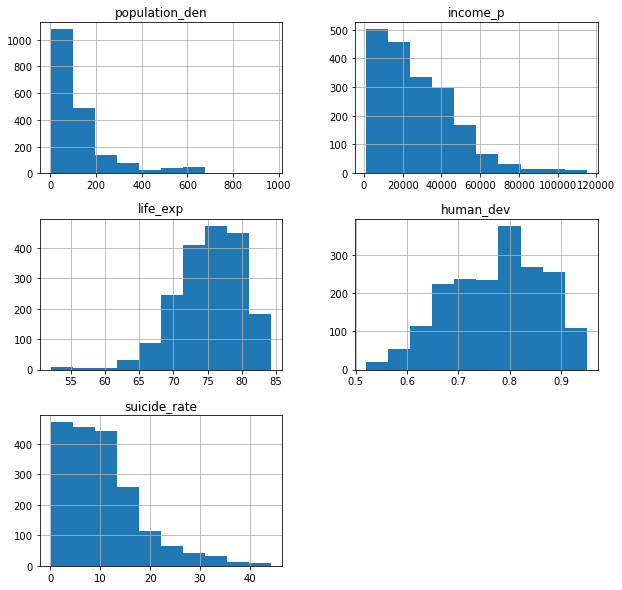

In [128]:
df_merged.hist(figsize=(10,10))
plt.show()

### **Now let's take suicide rate as a dependant variable and discuss it**

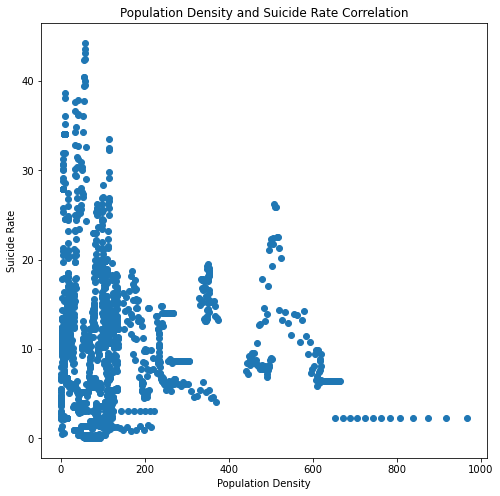

In [129]:
plt.figure(figsize=(8,8))
plt.scatter(df_merged['population_den'],df_merged['suicide_rate'])
plt.title('Population Density and Suicide Rate Correlation')
plt.xlabel('Population Density')
plt.ylabel('Suicide Rate')
plt.show()

> - Amazingly the correlation between population density and suicide rate is negative, 
 which I thought it would be the opposite, but I think nobody likes being alone :)

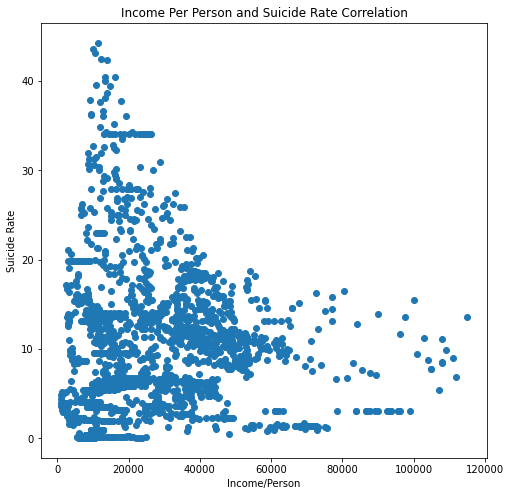

In [130]:
plt.figure(figsize=(8, 8))
plt.scatter(df_merged['income_p'],df_merged['suicide_rate'])
plt.title('Income Per Person and Suicide Rate Correlation')
plt.xlabel('Income/Person')
plt.ylabel('Suicide Rate')
plt.show()

> - I want to plot this graph again in the next sections to see correlation clearly, because the population here lies heavily in the left section so there are different suicide rates

### **Epxloring Human Development Index**

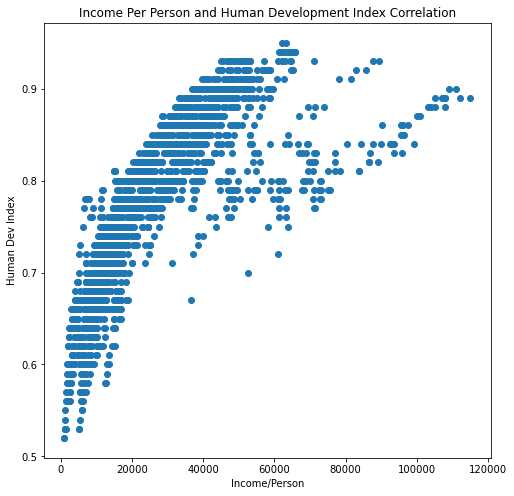

In [131]:
plt.figure(figsize=(8,8))
plt.scatter(df_merged['income_p'],df_merged['human_dev'])
plt.title('Income Per Person and Human Development Index Correlation')
plt.xlabel('Income/Person')
plt.ylabel('Human Dev Index')
plt.show()

> - Here is the correlation between income and human development rate, and I guess that people with high income have more access to development opportunities

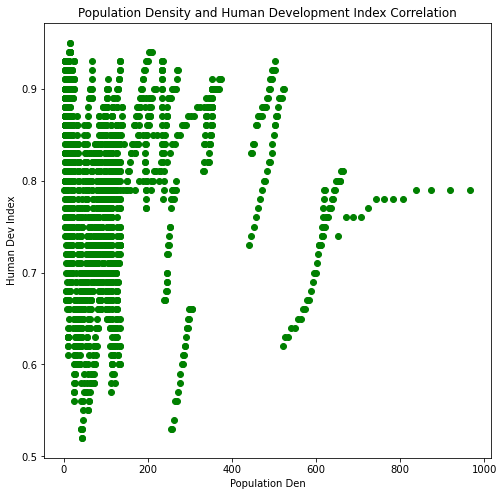

In [132]:
plt.figure(figsize=(8,8))
plt.scatter(df_merged['population_den'],df_merged['human_dev'],color=['green'])
plt.title('Population Density and Human Development Index Correlation')
plt.xlabel('Population Den')
plt.ylabel('Human Dev Index')
plt.show()

> - Another correlation about human development rate, but there is variety in the left section according to the data of population that lies heavily in this range, I think we can't get a clear correlation from this graph, let's try another one in other sections

### **Exploring Life Expectancy**

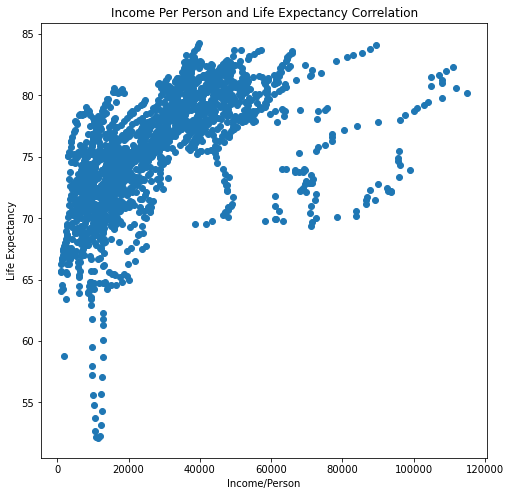

In [133]:
plt.figure(figsize=(8,8))
plt.scatter(df_merged['income_p'],df_merged['life_exp'])
plt.title('Income Per Person and Life Expectancy Correlation')
plt.xlabel('Income/Person')
plt.ylabel('Life Expectancy')
plt.show()

> - This insight gives us a positive correlation between income per person and life expectancy. 
 I guess this is due to health issues, people with more money get a better medical care

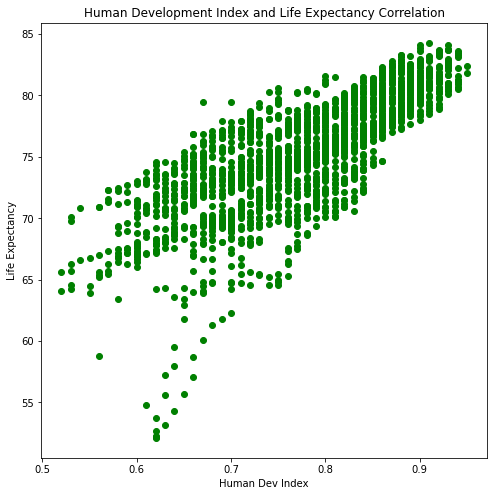

In [134]:
plt.figure(figsize=(8,8))
plt.scatter(df_merged['human_dev'],df_merged['life_exp'],color=['green'])
plt.title('Human Development Index and Life Expectancy Correlation')
plt.xlabel('Human Dev Index')
plt.ylabel('Life Expectancy')
plt.show()

> - This  is a very obvious positive correlation, whenever the development index is higher the life expectancy increases

### **Okay, now we want to explore the data over the years and over the countries. We won't be comparing all countries just the ones we're interested in**

In [135]:
#Data over countries 
df_countries = round(df_merged.groupby('country',as_index=False).mean(),2)

In [136]:
df_countries.head()

,country,population_den,income_p,life_exp,human_dev,suicide_rate
0,Albania,112.31,7364.23,75.88,0.69,3.80
1,Argentina,13.84,19703.85,74.59,0.77,6.69
2,Armenia,108.12,6475.38,72.39,0.67,2.17
3,Australia,2.60,39569.23,80.25,0.90,11.14
4,Austria,99.35,46873.08,78.97,0.85,14.48


### **Let's get the top five countries in life expectancy and explore them**

In [137]:
top_5_life =df_countries.nlargest(5, 'life_exp')
top_5_life

,country,population_den,income_p,life_exp,human_dev,suicide_rate
34,Japan,349.54,36230.77,81.94,0.86,16.58
63,Switzerland,186.42,59315.38,80.93,0.89,14.30
28,"Hong Kong, China",6.26,41688.46,80.89,0.85,11.21
30,Iceland,2.91,42184.62,80.81,0.87,11.42
62,Sweden,22.08,41888.46,80.41,0.89,11.35


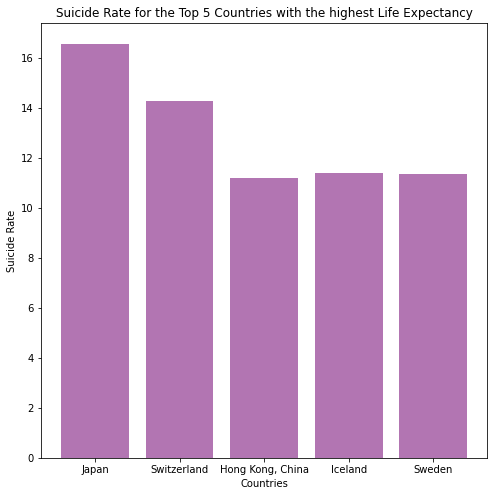

In [138]:
plt.figure(figsize=(8, 8))
plt.bar(top_5_life['country'],top_5_life['suicide_rate'],color = (0.5,0.1,0.5,0.6))
plt.title('Suicide Rate for the Top 5 Countries with the highest Life Expectancy')
plt.xlabel('Countries')
plt.ylabel('Suicide Rate')
plt.show()

> - Although we found a negative correlation between population density and suicide rate, Jaban has the highest density of all 5 countries above and the highest suicide rate

### **Exploring the top 5 countries in Population Density**

In [139]:
top_5_population =df_countries.nlargest(5, 'population_den')
top_5_population

,country,population_den,income_p,life_exp,human_dev,suicide_rate
6,Barbados,636.81,14765.38,75.09,0.77,6.40
44,Mauritius,585.08,13171.15,72.72,0.70,10.52
60,South Korea,489.12,25953.85,77.56,0.83,17.24
47,Netherlands,476.88,46742.31,79.20,0.88,8.30
5,Bahrain,390.39,46480.77,72.66,0.79,2.26


### Getting some statistics help me compare results I see

In [140]:
print(max(df_merged['human_dev']))
print(df_merged['suicide_rate'].mean())


0.95
10.329172813487839


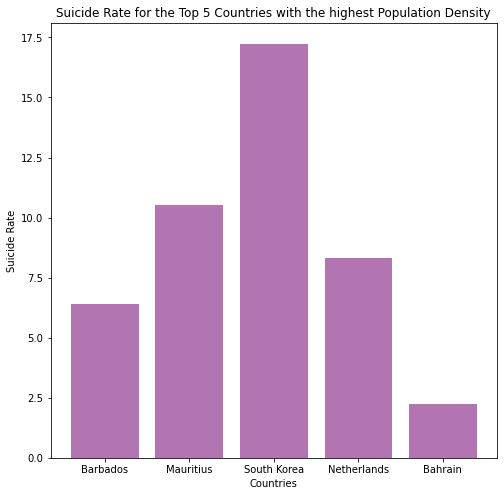

In [141]:
plt.figure(figsize=(8, 8))
plt.bar(top_5_population['country'],top_5_population['suicide_rate'],color = (0.5,0.1,0.5,0.6))
plt.title('Suicide Rate for the Top 5 Countries with the highest Population Density')
plt.xlabel('Countries')
plt.ylabel('Suicide Rate')
plt.show()

> - The highest country in suicide rate with the highest population is South Korea and it differs from the others by a relatively large number but it's still low accroding to statistics from this dataset

### Here I will sort the values by population to get a better visualization and a clear correlation

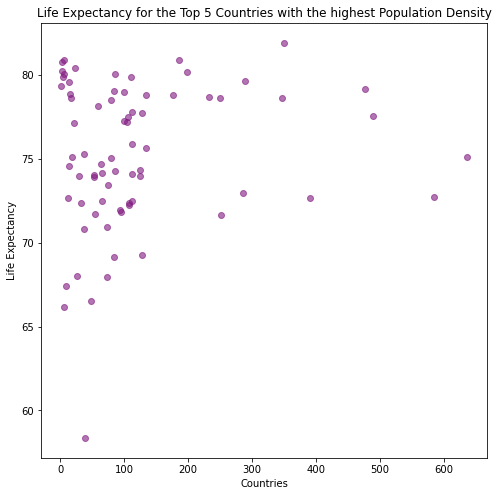

In [158]:
plt.figure(figsize=(8, 8))
df_countries_sorted = df_countries.sort_values('population_den',axis=0)
plt.scatter(df_countries_sorted['population_den'],df_countries_sorted['life_exp'],color = (0.5,0.1,0.5,0.6))
plt.title('Life Expectancy for the Top 5 Countries with the highest Population Density')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.show()

> - Population data is right skewed so the rates in the left section is distibuted along the axis, but I'm seeing a very low rates in the left section but the right has no low rates. 

In [169]:
df_merged['human_dev'].mean()

0.7745100105374074

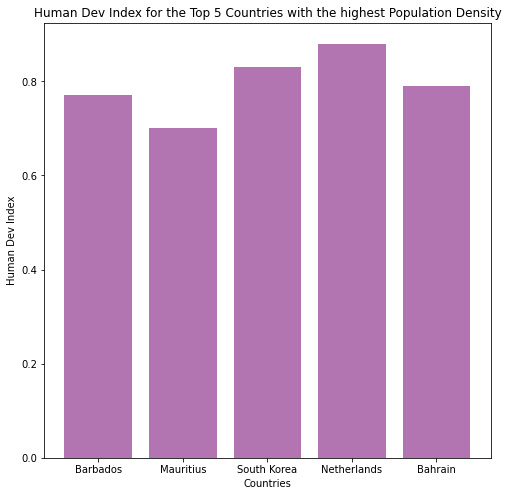

In [159]:
plt.figure(figsize=(8, 8))
plt.bar(top_5_population['country'],top_5_population['human_dev'],color = (0.5,0.1,0.5,0.6))
plt.title('Human Dev Index for the Top 5 Countries with the highest Population Density')
plt.xlabel('Countries')
plt.ylabel('Human Dev Index')
plt.show()

> - It seems that countries with high population density have a relatively human debelopment index

### **Exploring the top 5 countries in Income Per Person**

In [170]:
top_5_income =df_countries.nlargest(5, 'income_p')
top_5_income

,country,population_den,income_p,life_exp,human_dev,suicide_rate
41,Luxembourg,176.35,94776.92,78.80,0.86,11.67
52,Qatar,93.07,82807.69,71.94,0.82,3.04
9,Brunei,65.29,69576.92,72.52,0.81,1.38
56,Singapore,6.08,61803.85,80.07,0.84,8.98
63,Switzerland,186.42,59315.38,80.93,0.89,14.30


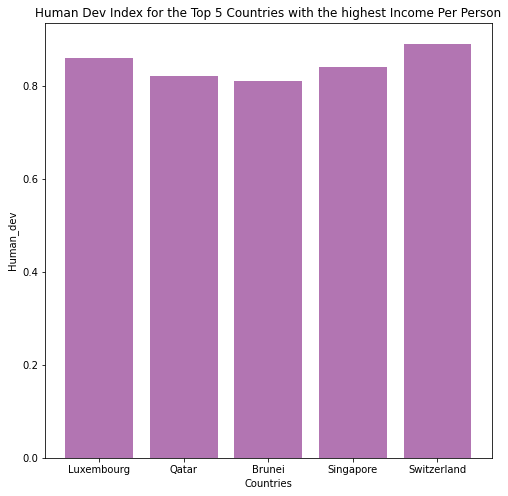

In [171]:
plt.figure(figsize=(8, 8))
plt.bar(top_5_income['country'],top_5_income['human_dev'],color = (0.5,0.1,0.5,0.6))
plt.title('Human Dev Index for the Top 5 Countries with the highest Income Per Person')
plt.xlabel('Countries')
plt.ylabel('Human_dev')
plt.show()

> - Swizerland is interesting, it has the lowest income in all 5 countries and the highest life expectancy, human dev index and suicide rate.

### **Top five countries in Human Development index**

In [172]:
top_5_human_dev =df_countries.nlargest(5, 'human_dev')
top_5_human_dev

,country,population_den,income_p,life_exp,human_dev,suicide_rate
49,Norway,12.65,56619.23,79.62,0.91,11.02
3,Australia,2.60,39569.23,80.25,0.90,11.14
62,Sweden,22.08,41888.46,80.41,0.89,11.35
63,Switzerland,186.42,59315.38,80.93,0.89,14.30
11,Canada,3.47,40019.23,79.89,0.88,11.50


### Getting max to compare

In [174]:

max(df_merged['population_den'])

967.0

> - I think this gives us the insight that population density affects human development index

### **Now let's explore the least five countries that are associated with the least 5 population densities and see if the population has a major impact on the rest of metrics**

In [ ]:
least_5_population =df_countries.nsmallest(5, 'population_den')
least_5_population

,country,population_den,income_p,life_exp,human_dev,suicide_rate
43,Malta,1.24,27696.15,79.37,0.80,4.77
3,Australia,2.60,39569.23,80.25,0.90,11.14
30,Iceland,2.91,42184.62,80.81,0.87,11.42
11,Canada,3.47,40019.23,79.89,0.88,11.50
36,Kazakhstan,5.89,15241.92,66.16,0.72,26.53


### Comparing to see the values range

In [175]:
round(df_merged.describe(),2)

,population_den,income_p,life_exp,human_dev,suicide_rate
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,121.04,27806.23,75.26,0.77,10.33
std,143.20,19817.05,4.78,0.09,7.89
min,1.02,1110.00,52.10,0.52,0.05
25%,30.92,11900.00,72.30,0.71,4.59
50%,83.00,23600.00,75.60,0.78,9.30
75%,126.00,39350.00,78.80,0.85,13.90
max,967.00,115000.00,84.30,0.95,44.30


### Plotting the countries associated with the highest human development to see the difference

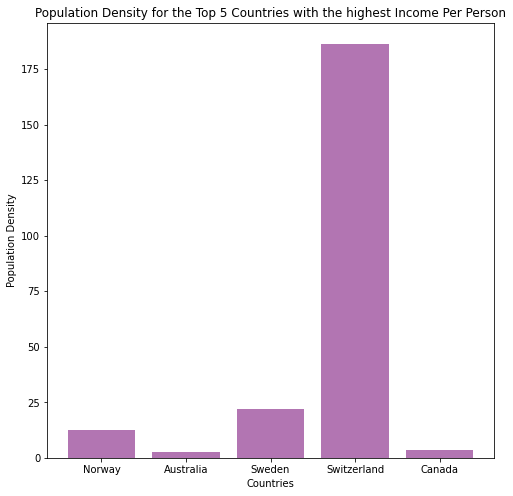

In [177]:
plt.figure(figsize=(8, 8))
plt.bar(top_5_human_dev['country'],top_5_human_dev['population_den'],color = (0.5,0.1,0.5,0.6))
plt.title('Population Density for the Top 5 Countries with the highest Income Per Person')
plt.xlabel('Countries')
plt.ylabel('Population Density')
plt.show()

> - as we see this confirms our observation before that human dev index has a negative correltion with population density

### **Now let's explore the data by years**

In [ ]:
#Data over years 
df_years = round(df_merged.groupby('year',as_index=False).mean(),2)
df_years.head(5)

,year,population_den,income_p,life_exp,human_dev,suicide_rate
0,1990,115.38,22092.60,72.96,0.72,10.93
1,1991,116.37,21695.07,73.01,0.72,10.95
2,1992,117.29,21839.86,73.17,0.72,11.12
3,1993,118.21,22070.55,73.12,0.72,11.44
4,1994,119.14,22580.41,73.24,0.73,11.62


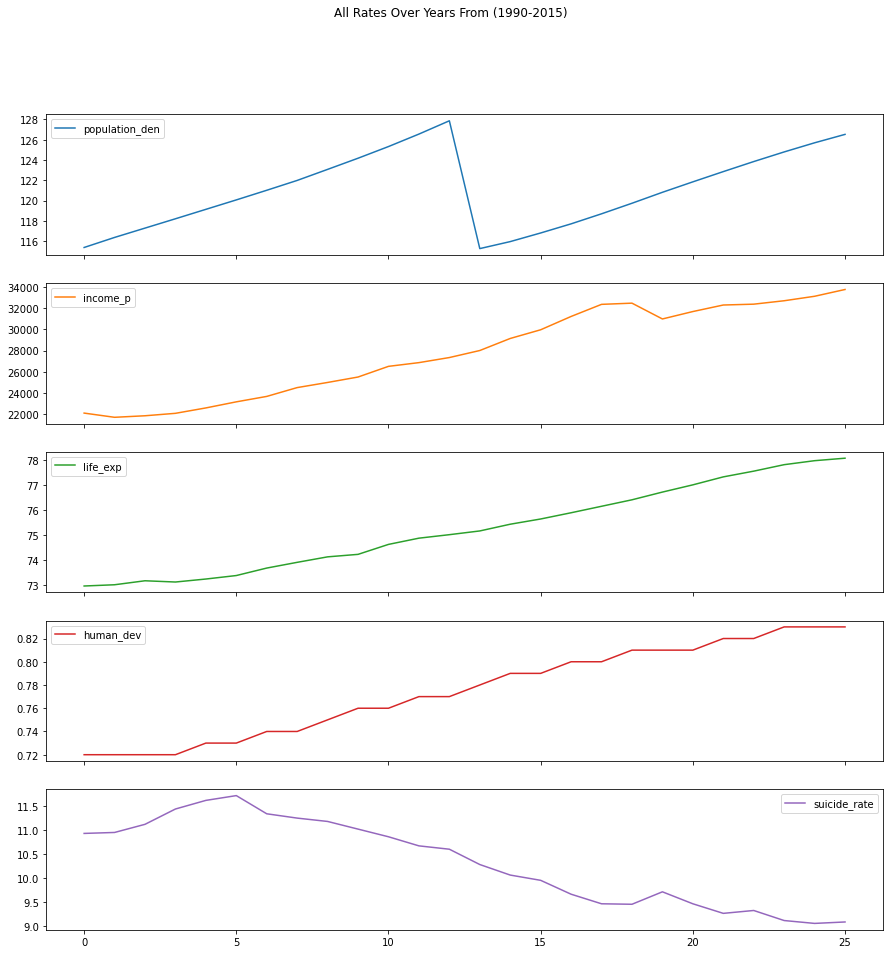

In [ ]:
df_years.plot(figsize = (15,15),subplots = True, title = 'All Rates Over Years From (1990-2015)');
plt.show()

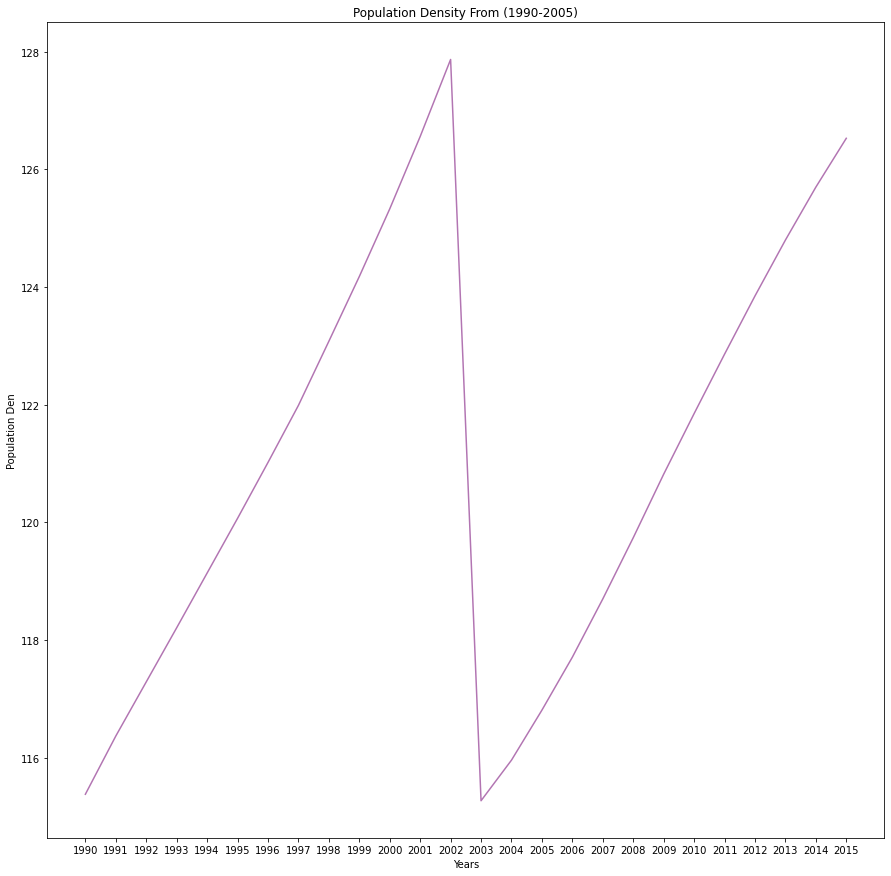

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(df_years['year'],df_years['population_den'],color = (0.5,0.1,0.5,0.6))
plt.title('Population Density From (1990-2005)')
plt.xlabel('Years')
plt.ylabel('Population Den')
plt.show()

> - We plotted the population Vs years in a separte graph because we want to see closely when the drop happened

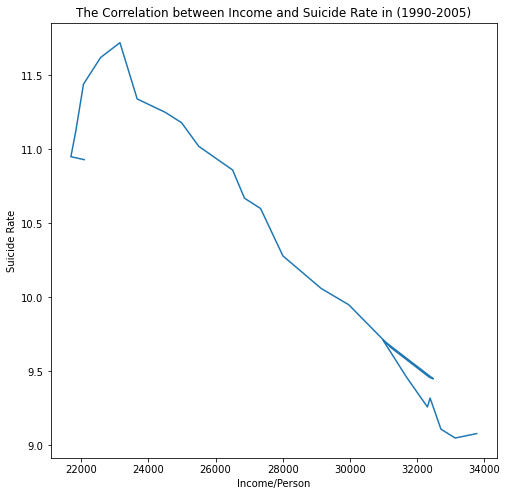

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_years['income_p'],df_years['suicide_rate'])
plt.title('The Correlation between Income and Suicide Rate in (1990-2005)')
plt.xlabel('Income/Person')
plt.ylabel('Suicide Rate')
plt.show()

> - This is a clear negative correlation betwwen Income and Suicide Rate

<a id='conclusions'></a>
# **Conclusions**

> - Population Density affects almost every aspect in people's lives, the less people there are the better income and development rate.
> - Every metric of these increases over the years (Population Density, Human Development Index, Income Per Person, Life Expectancy) excpet the Suicide Rate decreases.
> - There is a very obvious drop at the period from **(2001 to 2005)** in the Population Density we don't know exactly what caused it.
> - Amazingly the correlation between population density and suicide rate is negative, which I thought it would be the opposite, but I think nobody likes being alone :), even though in Japan which has a relatively high Population Density the suicide rate is also high, but it has the highest life expectancy.
> - The correlation between Income and Human Development Index is positive, I guess that people with high income have more access to development opportunities.
> - The average **Life Expectancy** is **75**.
> - According to insights from our data a positive correlation was found between income per person and life expectancy. 
 I guess this is due to health issues, people with more money get a better medical care. 
> - Ther is a very obvious negative correlation between **Income** and **Suicide Rate**.
> - Whenever the **Development Index** is higher the **Life Expectancy** increases, I wouldn't be surprised beacuase Human Development Index is an index used to rank countries by level of "Human Development". It contains three dimensions: health level, educational level and living standard. So countries with higher Development Index have higher standards for medical care.
> - **Barbados, Mauritius, South Korea, Netherlands and Bahrain** are the top five countries that associated with the highest Population Density. 
> - Another obvious conclusion that **Countries** with high population have less **Human Development Index**.
> - Kazakhstan was a very interesting country to explore, in the process of  getting the lowest five countries in Population Density which were **(Malta, Australia, Iceland, Canada and Kazakhstan)** we found some facts >> low population density in Kazakhstan and yet low income and low human development index but very high suicide rate.


# **Limitations**
> - This data represents the time between **(1990 - 2015)**, so there might be a different patterns in the older or newer data.
> - The suicide rate had so many missing data so the numbers are not very accurate.
> - We explored some of the countries not all of them individually. 

In [180]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1